In [17]:
import numpy as np
from PIL import Image
import matplotlib
%matplotlib inline

# Part 2: A Simple Fully Connected Network

The goal of this notebook is to introduce the fully connected neuron, activation and building a network with initialized parameters. First, we load an MNIST example for the digit "5" and set up some weights for a very simple one-layer neural network.

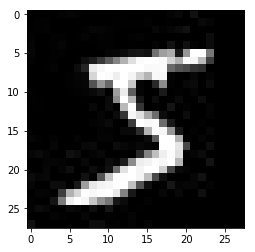

(10, 1)
Neural network output: 
 [[  4.87417189]
 [  8.93202046]
 [  0.02793288]
 [ 24.07781799]
 [ -0.8016074 ]
 [ -4.42153312]
 [  8.6226887 ]
 [  0.21884018]
 [  9.9636516 ]
 [-15.61643317]]


In [19]:
imgfile='number5.jpg'
img_pil = Image.open(imgfile)
data = np.asarray(img_pil).astype(np.float32).reshape((784,1))
# scale from 0-1
data=data/255.0
plt.imshow(img_pil)
plt.show()
# random data/label matrices can also be very useful, but here we'll use the digit
#data = np.random.random((784,1))
weights = np.random.randn(10, 784)
biases = np.random.randn(10, 1)
output = np.dot(weights,data) + biases
print(output.shape)
assert output.shape == (10,1), 'Shape is not what we expected'
print('Neural network output: \n',output)

Lets define some common activation functions and run them on our output data.

In [10]:
sigmoid = lambda x: 1/(1+np.exp(-x))
relu = lambda x: np.maximum(x, 0.0)
softmax = lambda x: np.exp(x)/np.nansum(np.exp(x), axis=0)
activations_relu = relu(output)
activations_sigmoid = sigmoid(output)
activations_softmax = softmax(output)
print('Activated (softmax) output:\n',activations_softmax)
print('Sum of activated softmaxed output: ', sum(activations_softmax))

Activated (softmax) output:
 [[1.99392588e-01]
 [6.06405806e-09]
 [2.68896161e-02]
 [2.12080792e-06]
 [2.74184100e-10]
 [3.56942281e-05]
 [4.90209255e-04]
 [1.61770278e-06]
 [2.57050114e-10]
 [7.73188147e-01]]
Sum of activated softmaxed output:  [1.]


A simple neural network for digit classification. Random parameters, distributed normally and scaled according to research on ideal scaling for initialization.

In this case, we will use a two layer fc, first layer is 784 inputs and 512 outputs, second layer is 512 inputs, 10 outputs. Takes in a 784x1 image (28x28 reshaped) and outputs 10 values.

In [11]:
w_scale=0.01
b_scale = 0.0
sizes=[784, 512, 10]
biases = [0.01*(2*np.random.randn(y, 1)-1) for y in sizes[1:]]
weights = [0.00001*(2*np.random.randn(y, x)-1) for x, y in zip(sizes[:-1], sizes[1:])]
print('Weights shapes: ',[w.shape for w in weights])
print('Biases shapes:  ',[b.shape for b in biases])
def forward(data, weights, biases, activation=sigmoid):
    activations=[data]
    for i in range(len(weights)):
        feat = np.dot(weights[i], activations[-1]) + biases[i]
        # only apply relu activation on penultimate layers
        act = activation(feat) if i < (len(weights)-1) or activation==sigmoid else feat
        activations.append(act)
    return activations[-1]

Weights shapes:  [(512, 784), (10, 512)]
Biases shapes:   [(512, 1), (10, 1)]


Lets run the network on the image data for two different activation functions.

In [12]:
act_fn=relu
print('Output (relu):\n', forward(data, weights, biases, act_fn))
act_fn=sigmoid
print('Output (sigmoid):\n', forward(data, weights, biases, act_fn))

Output (relu):  [[-0.00774397]
 [-0.02051468]
 [-0.01090689]
 [-0.01056058]
 [-0.02150136]
 [-0.00701392]
 [-0.04108243]
 [-0.01420905]
 [-0.01216662]
 [ 0.01515831]]
Output (sigmoid):  [[0.49740954]
 [0.49424145]
 [0.49661257]
 [0.49680188]
 [0.49398776]
 [0.49755367]
 [0.48907388]
 [0.49577982]
 [0.4963267 ]
 [0.50312694]]


Brief aside on regression vs classification. Two of the most popular loss/feedback methods are regression and classification. 
Regression typically involves metric distance between label and output and results in a scaled floating point value(s).
Classification involves finding the maximum (or minimum) output of a network and how much larger it is relative to other outputs.

In this case, we wish to classify digits (could also be done with regression, but with some tradeoffs), so we'll use a softmax and select the maximum below.

In [13]:
softmax = lambda x: np.exp(x)/np.nansum(np.exp(x), axis=0)
print('Softmaxed output: ', softmax(forward(data, weights, biases, act_fn)))
maxind = np.argmax(softmax(forward(data, weights, biases, act_fn)), axis=0)[0]
print('Maximum index: ', maxind)
print('"Probability": ', softmax(forward(data, weights, biases, act_fn))[maxind][0])

Softmaxed output:  [[0.10013134]
 [0.09981462]
 [0.10005157]
 [0.10007051]
 [0.0997893 ]
 [0.10014577]
 [0.09930015]
 [0.09996829]
 [0.10002297]
 [0.10070547]]
Maximum index:  9
"Probability":  0.10070547215285618


Finally, lets load some weights we got from somewhere.

In [16]:
import dill
with open('nnet_params.dill','rb') as fp:
    params = dill.load(fp)
weights = [params[0][0], params[1][0]]
biases = [params[0][1], params[1][1]]
act_fn=relu
print('Output (trained):\n', forward(data, weights, biases, act_fn))
print('Softmaxed ()trained) output:\n', softmax(forward(data, weights, biases, act_fn)))
maxind = np.argmax(softmax(forward(data, weights, biases, act_fn)), axis=0)[0]
print('\nMaximum (trained) index: ', maxind)
print('"Probability": ', softmax(forward(data, weights, biases, act_fn))[maxind][0])

Output (trained):
 [[ 0.05441621]
 [-0.03527451]
 [-0.00332656]
 [ 0.37345294]
 [-0.09257449]
 [ 0.44667264]
 [ 0.0884899 ]
 [ 0.10668931]
 [ 0.00630097]
 [-0.01047153]]
Softmaxed ()trained) output:
 [[0.09473242]
 [0.08660569]
 [0.08941724]
 [0.13033303]
 [0.08178269]
 [0.14023403]
 [0.09801592]
 [0.09981609]
 [0.09028226]
 [0.08878063]]

Maximum (trained) index:  5
"Probability":  0.1402340321583118


Voila, the right weights can get us good results. We could potentially get as good as 95% with this network (according to the MNIST leaderboard, it requires some data augmentation and other tricks). Notice this particular data example is pretty close to a "3", and this is reflected in the softmaxed output (and corresponding "confidence" level).